In [1]:
import jkgpca
import scipy.misc as misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap']='gray'
plt.rcParams['grid.color'] = '0.95'

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

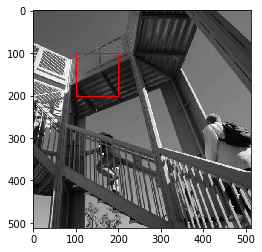

In [2]:
img = misc.ascent()
img = (img - img.min() ) / (img.max() - img.min())
img = img.astype(np.float32)
H, W = img.shape

region = np.array([100, 100, 100, 100], dtype=np.int32)

plt.imshow(img)
gca = plt.gca()
rect = patches.Rectangle((region[0],region[1]), region[2], region[3], linewidth='1', edgecolor='r', facecolor='None')
gca.add_patch(rect)

img_crop = img[region[0]:region[0]+region[2], region[1]:region[1]+region[3]]

# @Test of class

In [50]:
tilt = jkgpca.Tilt(img, region)
img_guess = tilt.guess_initial(3,3)

TILT constructor original
Frob, theta, t 64.1527099609375 -0.5235987901687622 -0.5
Frob, theta, t 61.863502502441406 -0.5235987901687622 -0.1666666567325592
Frob, theta, t 59.347808837890625 -0.1745329201221466 -0.1666666567325592
Frob, theta, t 55.208595275878906 0.174532949924469 -0.1666666567325592
Frob, theta, t 53.21907424926758 0.174532949924469 0.1666666865348816


In [51]:
Itau, I0, E, Tau = tilt.do_tilt(100, 50, 0.01)

# 0 F:  27.735990524291992 Err:  9.338930249214172e-05


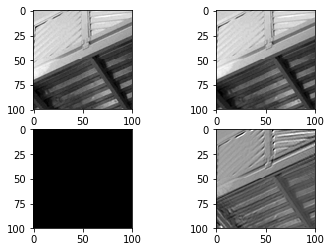

In [33]:
plt.subplot(2,2,1)
plt.imshow(img_crop)
plt.subplot(2,2,2)
plt.imshow(Itau)
plt.subplot(2,2,3)
plt.imshow(I0)
plt.subplot(2,2,4)
plt.imshow(E)
# plt.imshow(Tau)
# help(plt.imshow)

In [18]:
def update(i):
    Itau, I0, E, Tau = tilt.do_tilt(1, 50, 0.001)
    ax.imshow(Itau)
    return ax

# 0 F:  27.735485076904297 Err:  7.410244143102318e-05


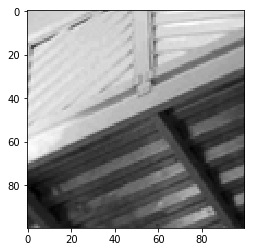

In [19]:
fig, ax = plt.subplots()

ax.imshow(Itau)

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, update, frames=np.arange(0, 50), interval=20)

In [20]:
anim.save('Itau.gif', dpi=80, writer='imagemagick')

# 0 F:  27.737863540649414 Err:  8.609100768808275e-05
# 0 F:  27.743078231811523 Err:  9.990126272896305e-05
# 0 F:  27.749570846557617 Err:  7.775278209010139e-05
# 0 F:  27.756153106689453 Err:  9.388825856149197e-05
# 0 F:  27.761804580688477 Err:  9.007885819301009e-05
# 0 F:  27.766189575195312 Err:  9.528959344606847e-05
# 0 F:  27.77001953125 Err:  9.01636085473001e-05
# 0 F:  27.77430534362793 Err:  7.119856309145689e-05
# 0 F:  27.777610778808594 Err:  9.605685772839934e-05
# 0 F:  27.778657913208008 Err:  8.994314703159034e-05
# 0 F:  27.776100158691406 Err:  9.308032167609781e-05
# 0 F:  27.77105140686035 Err:  7.467291288776323e-05
# 0 F:  27.764699935913086 Err:  6.823421426815912e-05
# 0 F:  27.75811004638672 Err:  9.497605788055807e-05
# 0 F:  27.751483917236328 Err:  8.63223394844681e-05
# 0 F:  27.74456214904785 Err:  7.548397115897387e-05
# 0 F:  27.73769187927246 Err:  7.10822714609094e-05
# 0 F:  27.731142044067383 Err:  8.710214751772583e-05
# 0 F:  27.72559928894

# @Test of transform_img

In [ ]:
img.shape[1]-100

In [ ]:
region = np.array([110, 110, 100, 100], dtype=np.int32)
# region = np.array([150, 150, 100, 100], dtype=np.float32)

region

In [ ]:
theta_ = [-np.pi/6, 0, np.pi/6]
t_ = [-0.5, 0., 0.5]

# theta = 0.
# t = 0.
# img_tr = jkgpca.transform_img(img, region, theta, t)

for theta in theta_:
    for t in t_:
        img_tr = jkgpca.transform_img(img, region, theta, t)
        plt.imshow(img_tr)
        plt.show()

In [ ]:
img_tr[47,57]

In [ ]:
plt.imshow(img_tr)

In [ ]:
img_tr

# @Test of compute perspecive transformation matrix and warping

In [11]:
# warped = np.zeros([400,400], dtype=np.float32)

pts1 = np.array([100,100,200,100,100,200,200,200], dtype=np.float32)
pts2 = np.array([0,0,200,0,0,100,100,100], dtype=np.float32)
# pts2 = pts1.astype(np.float32)

warped = np.zeros([100,100], dtype=np.float32)

P = jkgpca.compute_perspective(pts1, pts2)
# P_ori = P.astype(np.float64)
# P = np.linalg.inv(P)

# a,P = cv2.invert(P)

warped = jkgpca.warp_perspective(warped, img, P, 1)
plt.imshow(warped)

AttributeError: module 'jkgpca' has no attribute 'compute_perspective'

In [ ]:
warped

In [ ]:
theta = 0
t=0
theta_ = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
xx = np.array([[1,t],[0,1]])

In [ ]:
Tau = np.zeros([3,3])
Tau[:2,:2] = np.dot(theta_,xx)
Tau[2,2] = 1
Tau

In [ ]:
x1 = np.array([100,100,1])
x2 = np.array([200,100,1])
x3 = np.array([100,200,1])
x4 = np.array([200,200,1])
xc = np.array([150,150,1])

x1[0:2] -= xc[0:2]
x2[0:2] -= xc[0:2]
x3[0:2] -= xc[0:2]
x4[0:2] -= xc[0:2]

In [ ]:
print(x1)
x1 = np.dot(Tau, x1)
print(x1)

In [ ]:
x1[0:2] += xc[0:2]
x1

In [ ]:
import jkimg

In [ ]:
Ax, Ab = jkimg.compute_gradient(img)

In [ ]:
plt.imshow(Ax)